In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, accuracy_score


In [2]:
# Đọc dữ liệu từ tệp thứ nhất
df = pd.read_csv('WHR2005-2023.csv')

Asia = df[df['Regional Indicator'].isin(['Southeast Asia', 'East Asia'])]


Asia = Asia.round(4)
Asia.to_csv('Asia.csv', index = False)

In [3]:
Asia_float = Asia.select_dtypes(include=['float64'])
Asia_float

,Life Ladder,Logged GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
295,3.5687,7.7464,0.7931,57.640,NaN,0.2535,0.8292
296,4.1560,7.8263,0.6751,57.980,0.8187,0.1139,0.8785
297,4.4622,7.8745,0.6193,58.320,0.9142,0.0439,0.8884
298,4.1106,7.8602,0.8183,58.660,0.9372,0.1510,0.9648
299,4.1411,7.9036,0.6972,59.000,0.9401,0.3483,0.8957
...,...,...,...,...,...,...,...
2170,5.4675,9.2352,0.8476,65.300,0.9525,-0.1459,0.7879
2171,5.4623,9.2544,0.7645,65.400,0.9447,0.0658,0.7911
2172,5.5402,9.2713,0.7995,65.500,0.8968,0.1069,0.7978
2173,6.2665,9.3329,0.8787,65.600,0.9754,-0.1790,0.7034


In [4]:
countries = Asia['Country Name'].unique()
countries

array(['Cambodia', 'China', 'Hong Kong S.A.R. of China', 'Indonesia',
       'Japan', 'Laos', 'Malaysia', 'Mongolia', 'Myanmar', 'Philippines',
       'Singapore', 'South Korea', 'Taiwan Province of China', 'Thailand',
       'Vietnam'], dtype=object)

In [5]:
# Lặp qua từng quốc gia và điền giá trị trung bình cho các ô null
for country in countries:
    country_data = Asia[Asia['Country Name'] == country]
    for column in country_data.columns:
        if country_data[column].dtype == 'float64':
            Asia.loc[Asia['Country Name'] == country, column] = country_data[column].fillna(country_data[column].mean())

Asia.to_csv('Asia1.csv', index = False)

In [6]:
asia_data = pd.read_csv('Asia1.csv')

# Tách dữ liệu của Việt Nam
vietnam_data = asia_data[asia_data['Country Name'] == 'Vietnam']

vietnam_data.to_csv('Vietnam.csv', index=False)

In [7]:
vietnam_data

,Country Name,Regional Indicator,Year,Life Ladder,Logged GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
220,Vietnam,Southeast Asia,2006,5.2937,8.5538,0.887700,64.180,0.8858,-0.003500,0.778479
221,Vietnam,Southeast Asia,2007,5.4217,8.6131,0.856000,64.260,0.9178,0.071100,0.753900
222,Vietnam,Southeast Asia,2008,5.4804,8.6583,0.804600,64.340,0.8886,0.182500,0.789200
223,Vietnam,Southeast Asia,2009,5.3043,8.7006,0.815000,64.420,0.8341,-0.080000,0.837900
224,Vietnam,Southeast Asia,2010,5.2958,8.7522,0.786600,64.500,0.8315,-0.023900,0.742600
225,Vietnam,Southeast Asia,2011,5.7673,8.8037,0.897700,64.580,0.8184,0.086800,0.742200
226,Vietnam,Southeast Asia,2012,5.5346,8.8465,0.775000,64.660,0.8561,-0.128700,0.814900
227,Vietnam,Southeast Asia,2013,5.0227,8.8898,0.759500,64.740,0.9196,-0.045600,0.771200
228,Vietnam,Southeast Asia,2014,5.0849,8.9414,0.792200,64.820,0.8976,-0.018800,0.778479
229,Vietnam,Southeast Asia,2015,5.0763,8.9985,0.848700,64.900,0.8976,0.066400,0.778479


# Linear Model

Predicted Happiness Score for Vietnam(Linear Model): 5.494763019843849


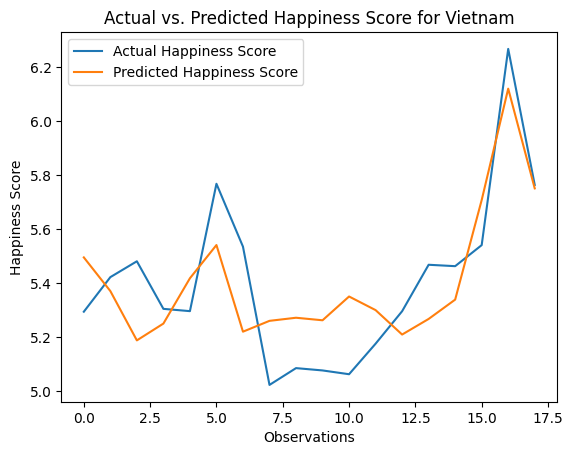

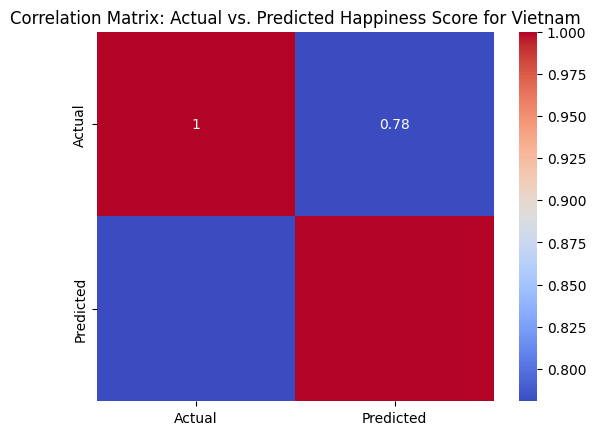

In [13]:
vietnam_data = pd.read_csv('Vietnam.csv')
features = ['Logged GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption']
target = 'Life Ladder'

X_train = vietnam_data[features]
y_train = vietnam_data[target]

# Chuẩn hóa dữ liệu sử dụng StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Tạo và huấn luyện mô hình tuyến tính
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Dự đoán chỉ số hạnh phúc cho Việt Nam trong tương lai
vietnam_features_scaled = scaler.transform(X_train)
vietnam_happiness_prediction = model.predict(vietnam_features_scaled)

# Hiển thị dự đoán và thực tế trên đồ thị
plt.plot(y_train, label='Actual Happiness Score')
plt.plot(vietnam_happiness_prediction, label='Predicted Happiness Score')
plt.xlabel('Observations')
plt.ylabel('Happiness Score')
plt.title('Actual vs. Predicted Happiness Score for Vietnam')
plt.legend()
print(f'Predicted Happiness Score for Vietnam(Linear Model): {vietnam_happiness_prediction[0]}')
plt.show()

# Vẽ ma trận hiệu suất dự đoán
sns.heatmap(pd.DataFrame({'Actual': y_train, 'Predicted': vietnam_happiness_prediction}).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Actual vs. Predicted Happiness Score for Vietnam")
plt.show()


# DecisionTree Regressor

Predicted Happiness Score for Vietnam (Decision Tree): 5.2937


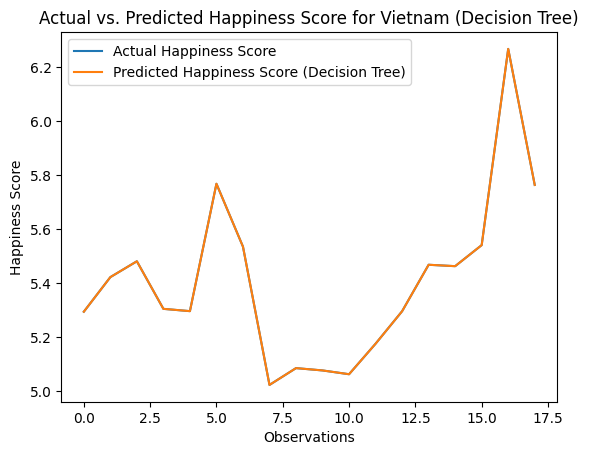

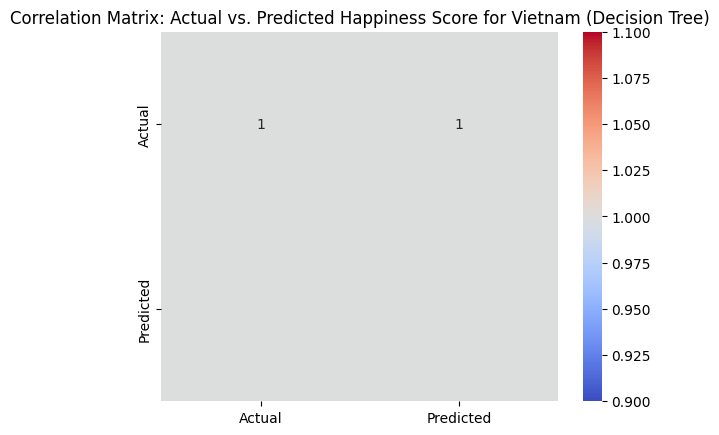

In [9]:

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Dự đoán chỉ số hạnh phúc cho Việt Nam trong tương lai
vietnam_happiness_prediction_dt = decision_tree_model.predict(X_train)

# Hiển thị dự đoán và thực tế trên đồ thị
plt.plot(y_train, label='Actual Happiness Score')
plt.plot(vietnam_happiness_prediction_dt, label='Predicted Happiness Score (Decision Tree)')
plt.xlabel('Observations')
plt.ylabel('Happiness Score')
plt.title('Actual vs. Predicted Happiness Score for Vietnam (Decision Tree)')
plt.legend()

# In ra chỉ số dự đoán
print(f'Predicted Happiness Score for Vietnam (Decision Tree): {vietnam_happiness_prediction_dt[0]}')

plt.show()

# Vẽ ma trận hiệu suất dự đoán
sns.heatmap(pd.DataFrame({'Actual': y_train, 'Predicted': vietnam_happiness_prediction_dt}).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Actual vs. Predicted Happiness Score for Vietnam (Decision Tree)")
plt.show()

# RandomForest Regressor

Predicted Happiness Score for Vietnam (Random Forest): 5.318272999999997


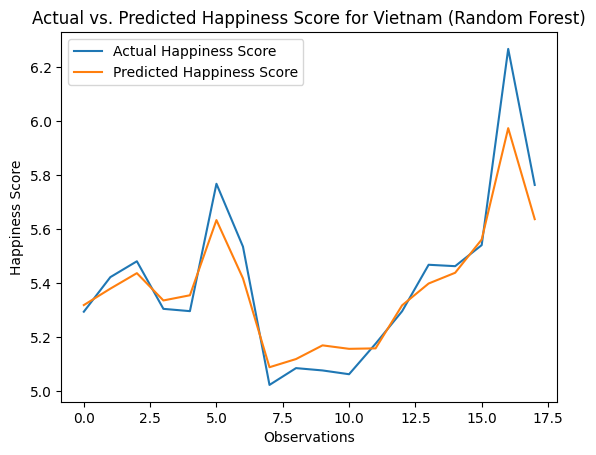

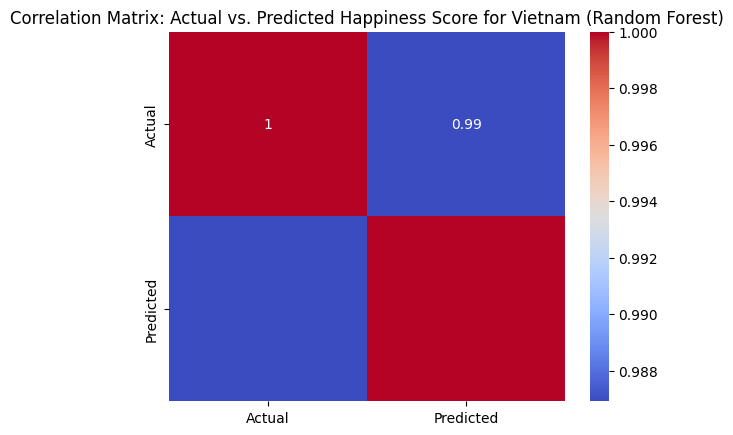

In [10]:

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Dự đoán chỉ số hạnh phúc cho Việt Nam trong tương lai
vietnam_happiness_prediction = model.predict(X_train)

# Hiển thị dự đoán và thực tế trên đồ thị
plt.plot(y_train, label='Actual Happiness Score')
plt.plot(vietnam_happiness_prediction, label='Predicted Happiness Score')
plt.xlabel('Observations')
plt.ylabel('Happiness Score')
plt.title('Actual vs. Predicted Happiness Score for Vietnam (Random Forest)')
plt.legend()

# In ra chỉ số dự đoán
print(f'Predicted Happiness Score for Vietnam (Random Forest): {vietnam_happiness_prediction[0]}')

plt.show()

# Vẽ ma trận hiệu suất dự đoán
sns.heatmap(pd.DataFrame({'Actual': y_train, 'Predicted': vietnam_happiness_prediction}).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Actual vs. Predicted Happiness Score for Vietnam (Random Forest)")
plt.show()

# Ensemble Model

Mean Squared Error (Ensemble): 0.06910460321437854


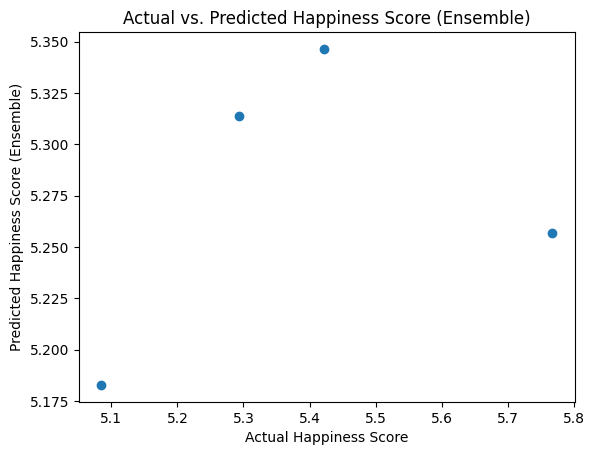

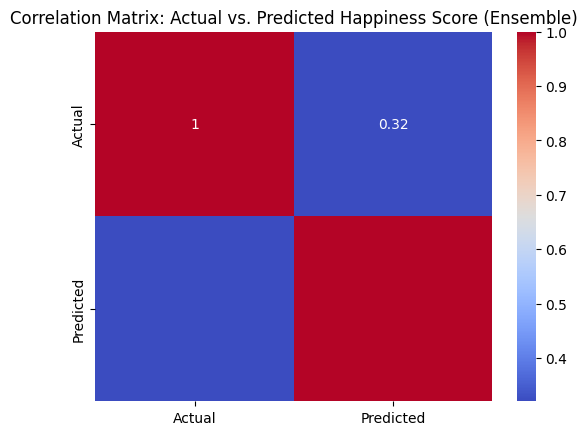

In [16]:

X_train, X_test, y_train, y_test = train_test_split(vietnam_data[features], vietnam_data[target], test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu sử dụng StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tạo và huấn luyện các mô hình
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Tạo mô hình kết hợp (voting)
ensemble_model = VotingRegressor([('linear', linear_model), ('decision_tree', decision_tree_model), ('random_forest', random_forest_model)])

# Huấn luyện mô hình kết hợp
ensemble_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Đánh giá mô hình bằng mean squared error
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
print(f'Mean Squared Error (Ensemble): {mse_ensemble}')

# Hiển thị dự đoán và thực tế trên đồ thị
plt.scatter(y_test, y_pred_ensemble)
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score (Ensemble)")
plt.title("Actual vs. Predicted Happiness Score (Ensemble)")
plt.show()

# Vẽ ma trận hiệu suất dự đoán
sns.heatmap(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ensemble}).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Actual vs. Predicted Happiness Score (Ensemble)")
plt.show()